## Step 1: Imports

### In this section, first import relevant Python libraries and modules.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

### Now load the dataset into a DataFrame. 

In [3]:
data = pd.read_csv('marketing_sales_data.csv')

## Step 2. Data Exploration

### To get a sense of what the data includes, display the first 10 rows of the data.

In [4]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


### To get a sense of how large the data is, identify the number of rows and the number of columns in the data.

In [5]:
data.shape

(572, 5)

### Now check which columns have null or missing values

In [6]:
data.isnull().sum(axis=0)

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

### Now drop the number of rows with null or missing values

In [7]:
data = data.dropna(axis=0)

In [8]:
data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

### Check model assumptions.
You would like to explore the relationship between radio promotion budget and sales. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built --- you will address those in this section. After the model is built, you can finish checking the assumptions.

### Start by creating a plot of pairwise relationships in the data.
This will help you visualize the relationships between variables in the data and help you check model assumptions. 

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


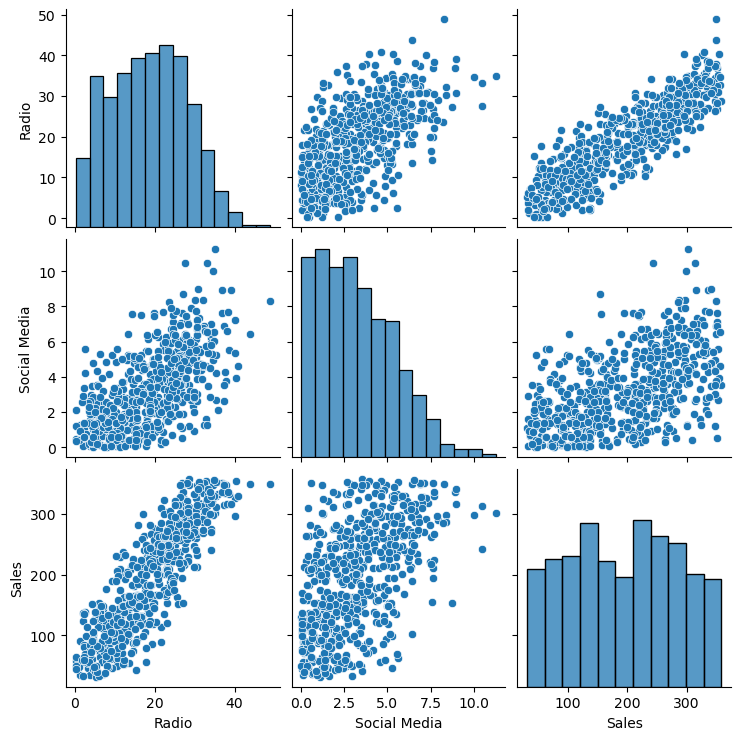

In [9]:
sns.pairplot(data)

## Step 3. Model Building


### Start by selecting only the columns that are needed for the model that you will build from the data.

In [10]:
ols_data = data[['Radio','Sales']]

### Display the first 10 rows of the new DataFrame to ensure it is accurate.

In [11]:
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


### Write the linear regression formula for modeling the relationship between the two variables of interest.

In [12]:
ols_formula = 'Sales ~ Radio'

### Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [13]:
OLS = ols(formula=ols_formula,data=ols_data)

### Create a linear regression model for the data and fit the model to the data.

In [15]:
model = OLS.fit()

## Step 4. Results and Evaluation

### Get a summary of the results from the model.


In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          2.07e-176
Time:                        18:31:48   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the OLS data with the best fit regression line.

<Axes: xlabel='Radio', ylabel='Sales'>

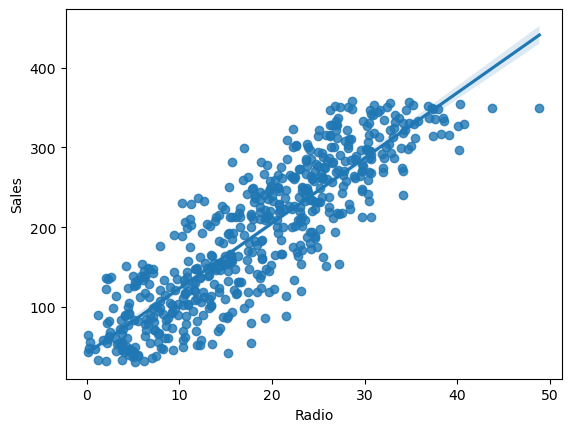

In [17]:
sns.regplot(x='Radio',y='Sales',data=ols_data)

### Check the normality assumption.

To get started, get the residuals from the model.

In [18]:
residuals = model.resid

Visualize the distribution of the residuals.

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Residual')

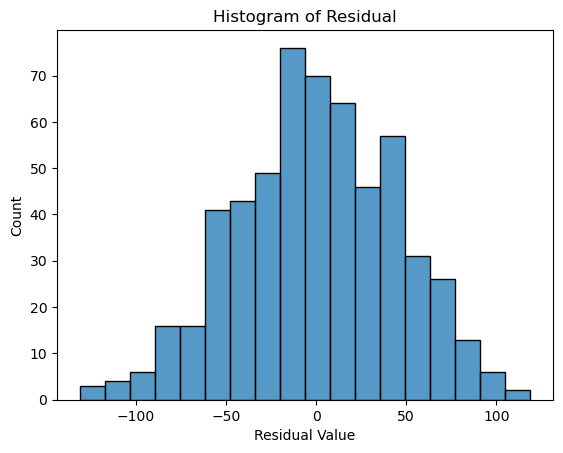

In [21]:
sns.histplot(residuals)
plt.xlabel('Residual Value')
plt.title('Histogram of Residual')

### Create a Q-Q plot to confirm the assumption of normality.

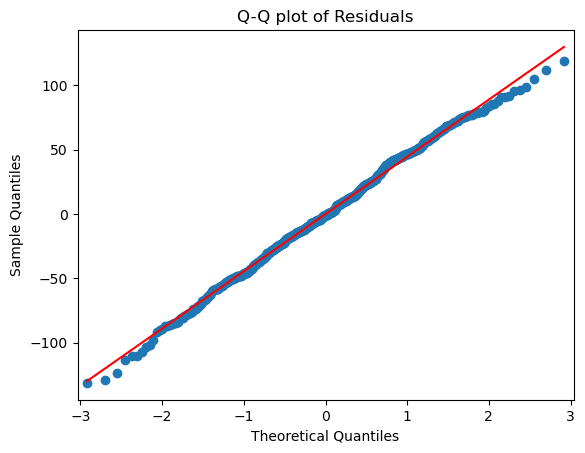

In [22]:
sm.qqplot(residuals,line='s')
plt.title('Q-Q plot of Residuals')
plt.show()

In [23]:
fitted_values = model.predict(ols_data['Radio'])

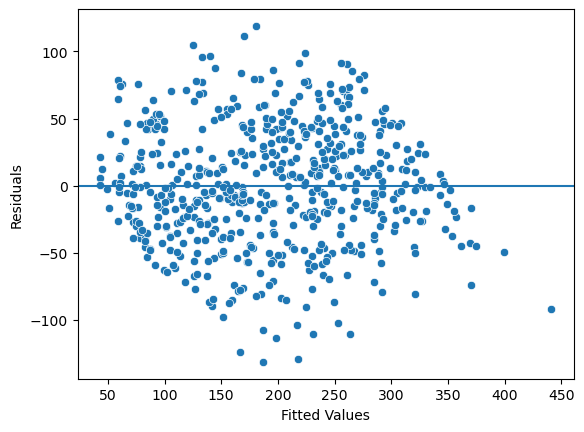

In [24]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()